# **HYPOTHESIS TESTING (ONE WAY ANOVA)**

## # CONCEPT

One-Way ANOVA ("analysis of variance") compares the means of two or more independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. Use a one-way ANOVA when you have collected data about one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three levels (i.e. at least three different groups or categories).

A one-way ANOVA uses the following null and alternative hypotheses:

1. H0 (null hypothesis) : μ1 = μ2 = μ3 = … = μk (all the population means are equal and there is no significant effect between the independent variable and the dependent variable)
2. H1 (alternative hypothesis) : at least one population mean is different from the rest and there is significant effect between the independent variable and the dependent variable

**Interpretation :**
- Compare the p-value to the significance level to determine whether to reject the null hypothesis. 
- When the p-value is less than the significance level, the usual interpretation is that the results are statistically significant, and you reject H0.

## # CASE

Given the “Data Customer Personality Analysis” dataset from the source https://www.kaggle.com/imakash3011/customer-personality-analysis. Find the value of central tendency measurement and the spread measurement of that data (descriptive statistics), and do hypothesis testing to prove whether education has an effect on income or not.

### IMPORT LIBRARY

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [10]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

### READ DATASET

In [11]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Data Science/marketing_campaign.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
# To be easily observed and analyzed, just show two variables that will be tested (education and income)
observed_df = df[['Education', 'Income']]
observed_df

,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
4,PhD,58293.0
...,...,...
2235,Graduation,61223.0
2236,PhD,64014.0
2237,Graduation,56981.0
2238,Master,69245.0


In [14]:
# Count the row and column of dataset
observed_df.shape

(2240, 2)

In [15]:
# Used to get a series containing counts of unique values, from this function we know that there are 5 group of independent variable (Education) and the amount of data of each level 
observed_df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

### MISSING DATA & OUTLIER HANDLING

In [16]:
# Used to print a concise summary of a data frame, from this function we know that there are 24 of missing income data
observed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  2240 non-null   object 
 1   Income     2216 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.1+ KB


In [17]:
observed_df.isnull().sum()

Education     0
Income       24
dtype: int64

Observed Missing Data and Prepocessing Data of Each Group

### ***a. Group 1 - Graduation***

In [18]:
# filter data of graduation group
df_Graduation = observed_df[observed_df['Education'] == 'Graduation']
df_Graduation

,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
6,Graduation,55635.0
...,...,...
2232,Graduation,26816.0
2233,Graduation,666666.0
2234,Graduation,34421.0
2235,Graduation,61223.0


In [19]:
# Count missing data of graduation group
nan_grad_value1 = df_Graduation.isnull().sum()
nan_grad_value1

Education     0
Income       11
dtype: int64

In [20]:
# Show missing data of graduation group
show_nan_graduation = df_Graduation[df_Graduation.isna().any(axis=1)]
show_nan_graduation

,Education,Income
10,Graduation,NaN
27,Graduation,NaN
48,Graduation,NaN
58,Graduation,NaN
91,Graduation,NaN
133,Graduation,NaN
312,Graduation,NaN
319,Graduation,NaN
1382,Graduation,NaN
2078,Graduation,NaN


In [21]:
# Calculate the percentage of missing data in graduation group to choose which data cleaning technique is suitable
# Because percentage of missing data in graduation group is 0,98%, better we use imputation data than remove it
data_missing_value = df_Graduation.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_Graduation))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Income,11,0.98


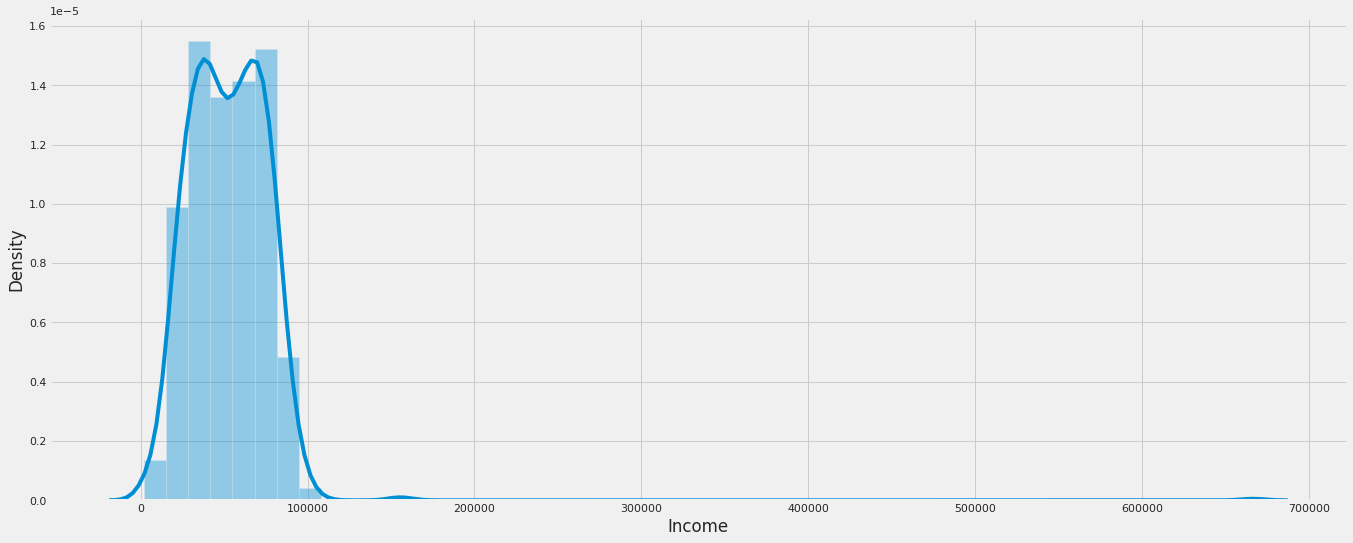

In [22]:
# Draw the distibution of data to make decision whether the imputation better using mean or median
# From graphic below, the variable is skewed, so the median is a better representation 
sns.distplot(df_Graduation['Income'])

In [23]:
# Imputation income data of graduation group using median
df_Graduation['Income'] = df_Graduation['Income'].fillna(df_Graduation['Income'].mean())
df_Graduation

,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
6,Graduation,55635.0
...,...,...
2232,Graduation,26816.0
2233,Graduation,666666.0
2234,Graduation,34421.0
2235,Graduation,61223.0


In [24]:
# After imputation there is no missing data
nan_grad_value2 = df_Graduation.isnull().sum()
nan_grad_value2

Education    0
Income       0
dtype: int64

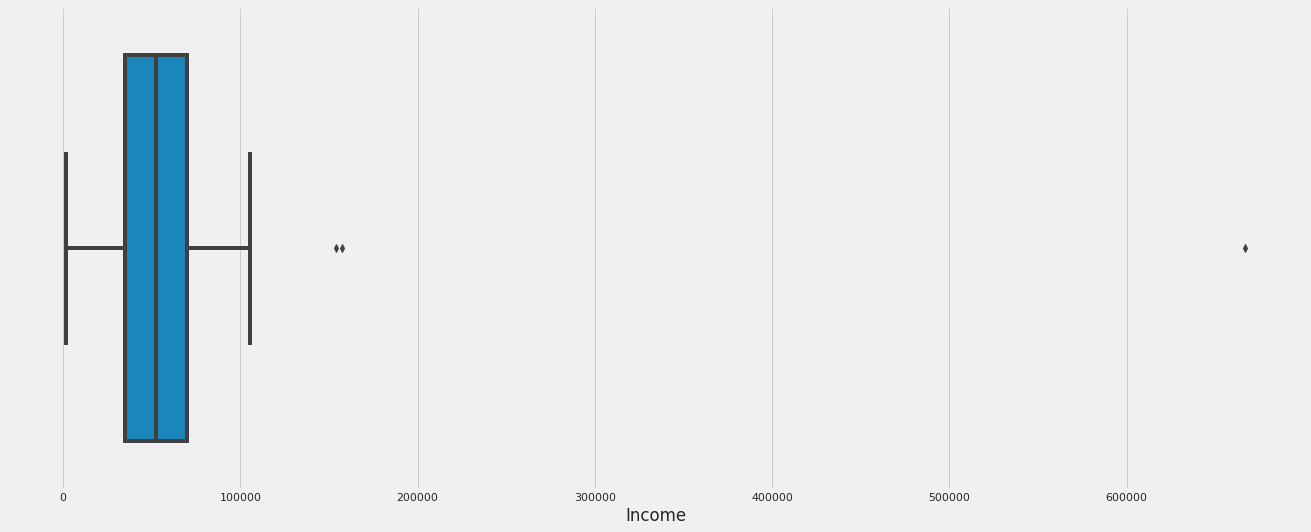

In [25]:
# Check outlier using boxplot
# There is outlier at the right side (> upper whisker)
sns.boxplot(data=df_Graduation,x=df_Graduation['Income'])

In [26]:
# Outlier Handling 
Q1  =  df_Graduation['Income'].quantile(0.25)
Q3  =  df_Graduation['Income'].quantile(0.75)
IQR =  Q3-Q1
print("Q1 \t\t : ", Q1)
print("Q3 \t\t : ",Q3)
print("IQR \t\t : ",IQR)
Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)
print("Lower Whisker  \t : ", Lower_Whisker)
print("Upper Whisker  \t : ", Upper_Whisker)
filtered_grad = (( df_Graduation['Income'] >= Lower_Whisker) & (df_Graduation['Income'] <= Upper_Whisker))
df_Graduation1 = df_Graduation[filtered_grad]
print('Jumlah baris sebelum handling outlier pada kolom Income\t:', len(df_Graduation))
print(f'Jumlah baris setelah memfilter outlier\t\t\t:', len(df_Graduation1))
df_Graduation1.head()

Q1 		 :  34925.5
Q3 		 :  69737.0
IQR 		 :  34811.5
Lower Whisker  	 :  -17291.75
Upper Whisker  	 :  121954.25
Jumlah baris sebelum handling outlier pada kolom Income	: 1127
Jumlah baris setelah memfilter outlier			: 1124


,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
6,Graduation,55635.0


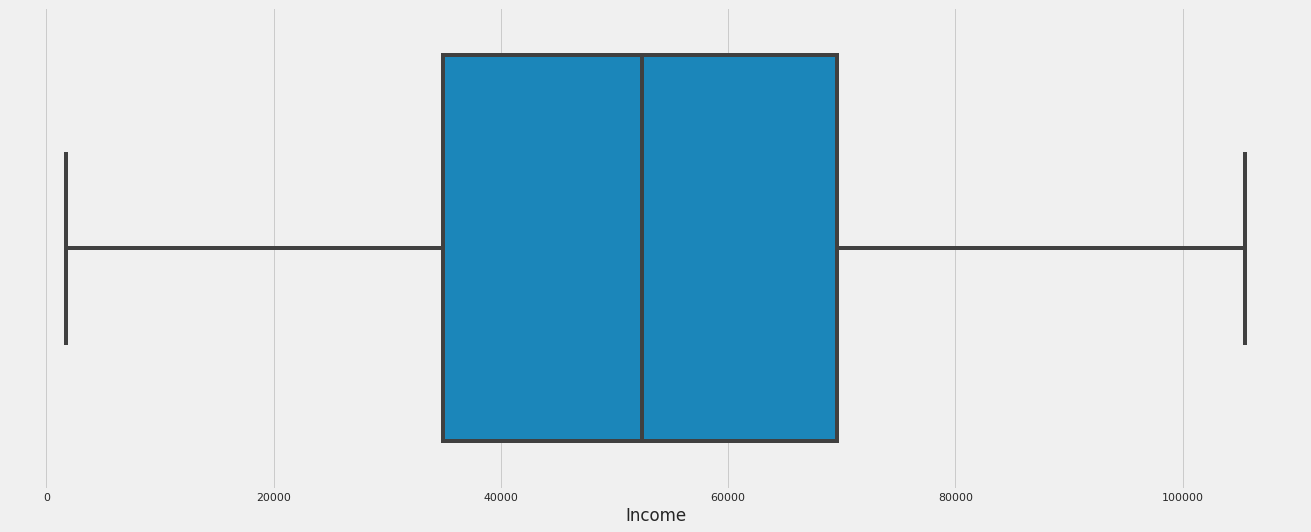

In [27]:
# after clear the outlier data
sns.boxplot(data=df_Graduation1,x=df_Graduation1['Income'])

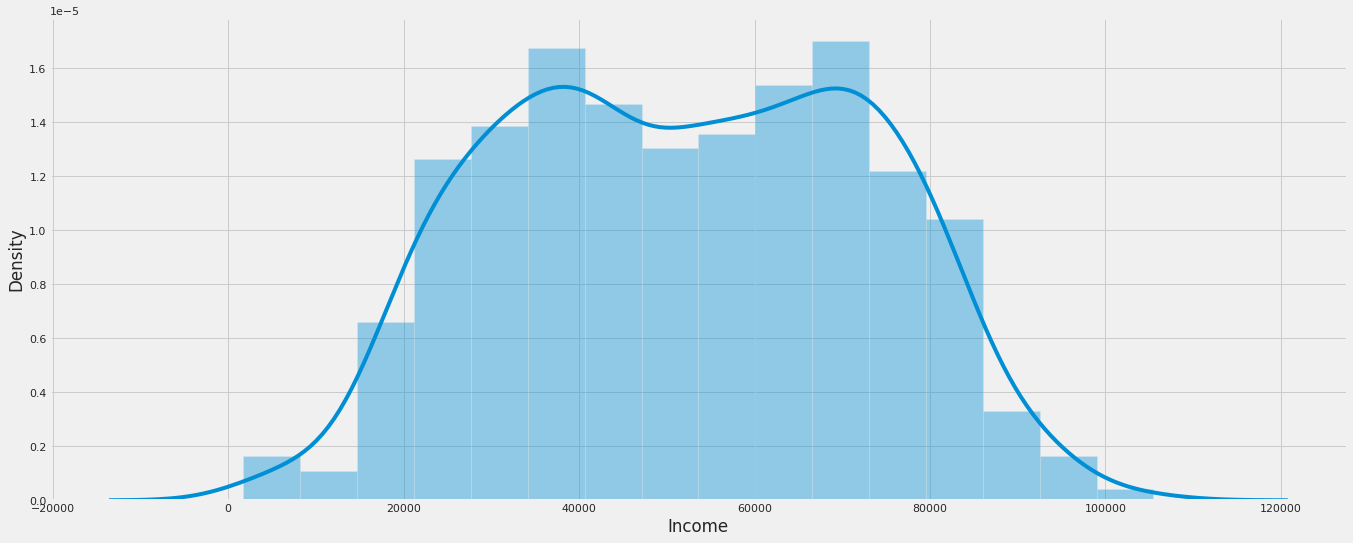

In [28]:
sns.distplot(df_Graduation1['Income'])

### ***b. Group 2 - PhD***

In [29]:
# filter data of PhD group
df_PhD = observed_df[observed_df['Education'] == 'PhD']
df_PhD

,Education,Income
4,PhD,58293.0
7,PhD,33454.0
8,PhD,30351.0
9,PhD,5648.0
15,PhD,82800.0
...,...,...
2202,PhD,48432.0
2217,PhD,82032.0
2224,PhD,57642.0
2236,PhD,64014.0


In [30]:
# Count missing data of PhD group
nan_phd_value1 = df_PhD.isnull().sum()
nan_phd_value1

Education    0
Income       5
dtype: int64

In [31]:
# Show missing data of PhD group
show_nan_PhD = df_PhD[df_PhD.isna().any(axis=1)]
show_nan_PhD

,Education,Income
43,PhD,NaN
90,PhD,NaN
128,PhD,NaN
1386,PhD,NaN
2061,PhD,NaN


In [32]:
# Calculate the percentage of missing data in PhD group to choose which data cleaning technique is suitable
# Because percentage of missing data in PhD group is 1,03%, better we use imputation data than remove it
data_missing_value = df_PhD.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_PhD))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Income,5,1.03


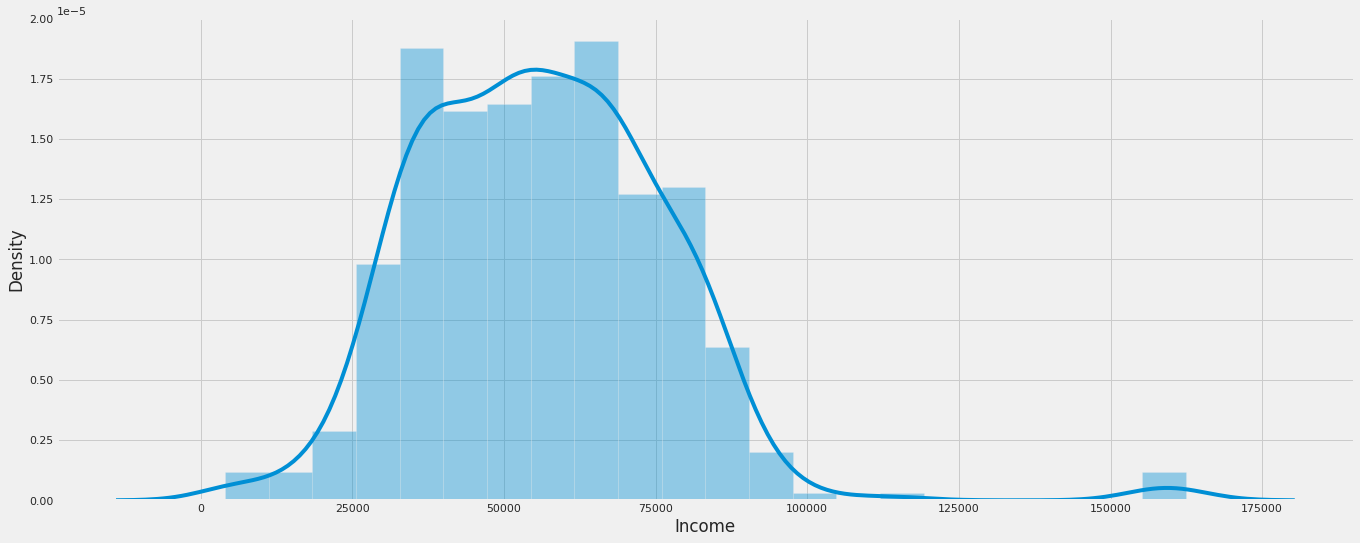

In [33]:
# Draw the distibution of data to make decision whether the imputation better using mean or median
# From graphic below, the variable is skewed, so the median is a better representation 
sns.distplot(df_PhD['Income'])

In [34]:
# Imputation income data of PhD group using median
df_PhD['Income'] = df_PhD['Income'].fillna(df_PhD['Income'].median())
df_PhD  

,Education,Income
4,PhD,58293.0
7,PhD,33454.0
8,PhD,30351.0
9,PhD,5648.0
15,PhD,82800.0
...,...,...
2202,PhD,48432.0
2217,PhD,82032.0
2224,PhD,57642.0
2236,PhD,64014.0


In [35]:
# After imputation there is no missing data
nan_PhD_value2 = df_PhD.isnull().sum()
nan_PhD_value2

Education    0
Income       0
dtype: int64

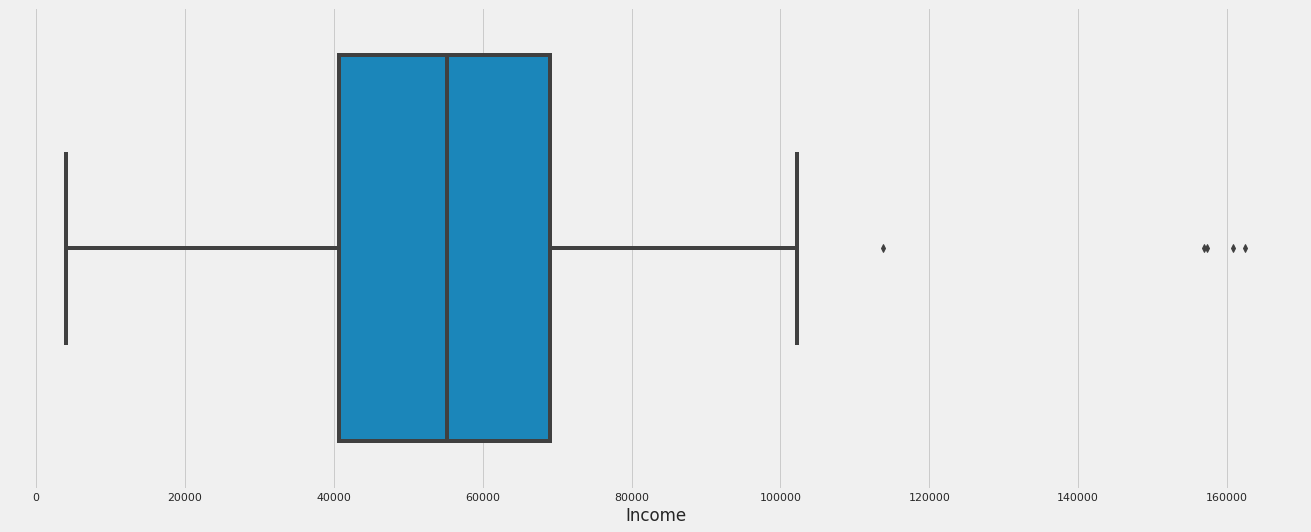

In [36]:
# Check outlier using boxplot
# There is outlier at the right side (> upper whisker)
sns.boxplot(data=df_PhD,x=df_PhD['Income'])

In [37]:
# Outlier Handling 
Q1  =  df_PhD['Income'].quantile(0.25)
Q3  =  df_PhD['Income'].quantile(0.75)
IQR =  Q3-Q1
print("Q1 \t\t : ", Q1)
print("Q3 \t\t : ",Q3)
print("IQR \t\t : ",IQR)
Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)
print("Lower Whisker  \t : ", Lower_Whisker)
print("Upper Whisker  \t : ", Upper_Whisker)
filtered_phd = (( df_PhD['Income'] >= Lower_Whisker) & (df_PhD['Income'] <= Upper_Whisker))
df_PhD1 = df_PhD[filtered_phd]
print('Jumlah baris sebelum handling outlier pada kolom Income\t:', len(df_PhD))
print(f'Jumlah baris setelah memfilter outlier \t\t\t:', len(df_PhD1))
df_PhD1.head()

Q1 		 :  40654.25
Q3 		 :  69084.0
IQR 		 :  28429.75
Lower Whisker  	 :  -1990.375
Upper Whisker  	 :  111728.625
Jumlah baris sebelum handling outlier pada kolom Income	: 486
Jumlah baris setelah memfilter outlier 			: 481


,Education,Income
4,PhD,58293.0
7,PhD,33454.0
8,PhD,30351.0
9,PhD,5648.0
15,PhD,82800.0


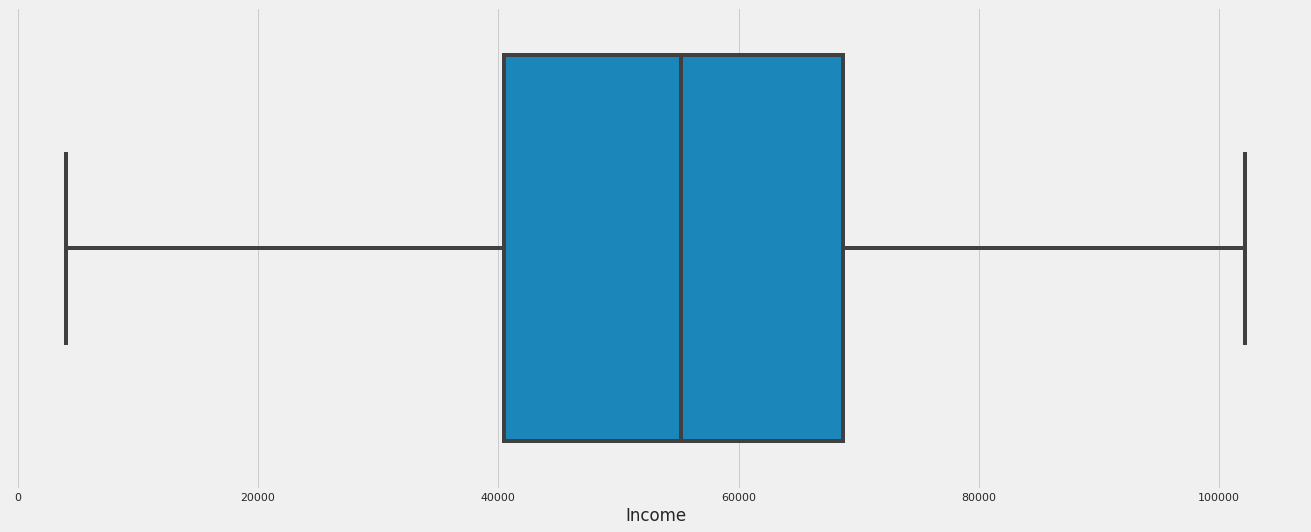

In [38]:
# after clear the outlier data
sns.boxplot(data=df_PhD1,x=df_PhD1['Income'])

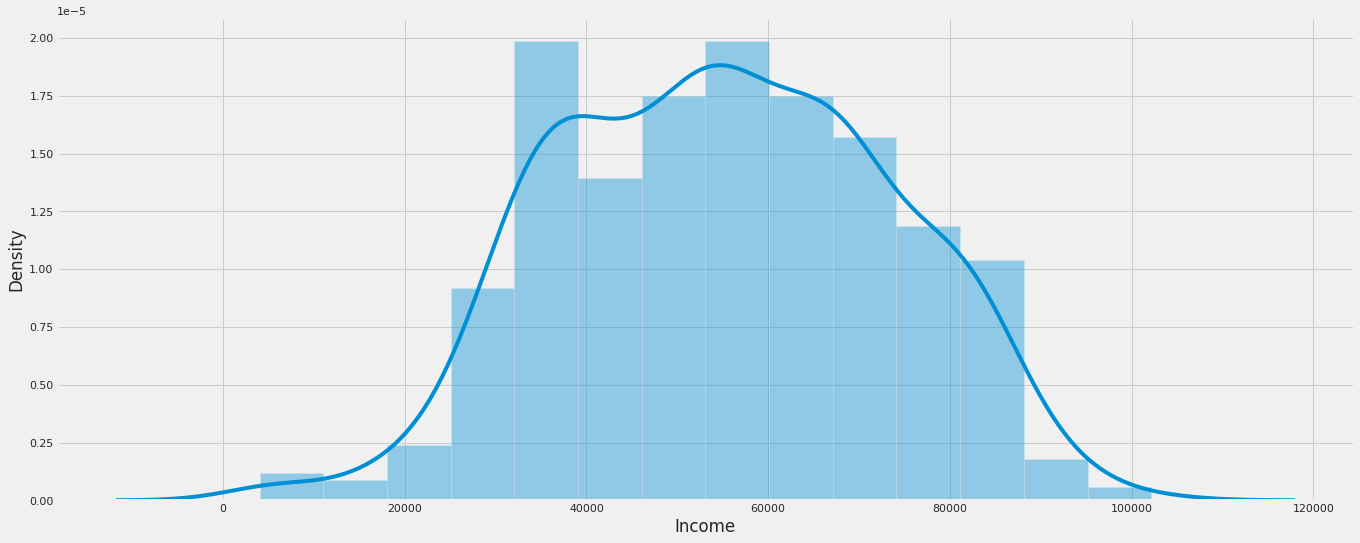

In [39]:
sns.distplot(df_PhD1['Income'])

###***c. Group 3 - Master***

In [40]:
# filter data of Master group
df_Master = observed_df[observed_df['Education'] == 'Master']
df_Master

,Education,Income
5,Master,62513.0
13,Master,59354.0
18,Master,76995.0
30,Master,10979.0
31,Master,38620.0
...,...,...
2219,Master,40101.0
2221,Master,75777.0
2223,Master,33562.0
2231,Master,44802.0


In [41]:
# Count missing data of Master group
nan_master_value1 = df_Master.isnull().sum()
nan_master_value1

Education    0
Income       5
dtype: int64

In [42]:
# Show missing data of Master group
show_nan_Master = df_Master[df_Master.isna().any(axis=1)]
show_nan_Master

,Education,Income
92,Master,NaN
1379,Master,NaN
2059,Master,NaN
2079,Master,NaN
2084,Master,NaN


In [43]:
# Calculate the percentage of missing data in Master group to choose which data cleaning technique is suitable
# Because percentage of missing data in Master group is 1,35%, better we use imputation data than remove it
data_missing_value = df_Master.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_Master))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Income,5,1.35


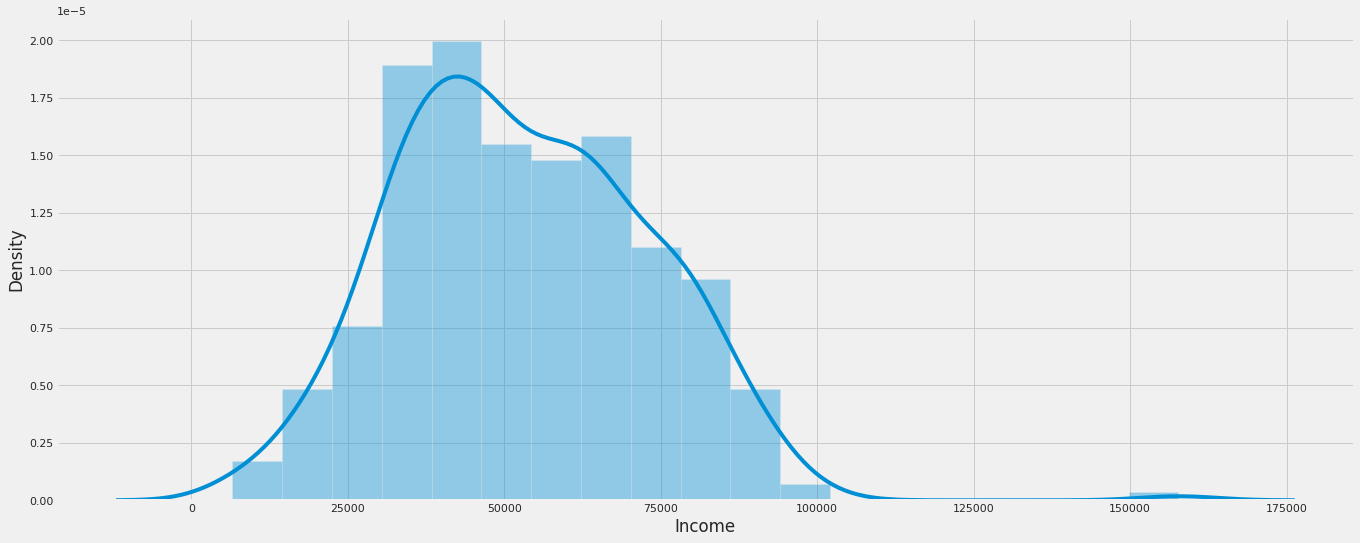

In [44]:
# Draw the distibution of data to make decision whether the imputation better using mean or median
# From graphic below, the variable is skewed, so the median is a better representation 
sns.distplot(df_Master['Income'])

In [45]:
# Imputation income data of Master group using median
df_Master['Income'] = df_Master['Income'].fillna(df_Master['Income'].median())
df_Master 

,Education,Income
5,Master,62513.0
13,Master,59354.0
18,Master,76995.0
30,Master,10979.0
31,Master,38620.0
...,...,...
2219,Master,40101.0
2221,Master,75777.0
2223,Master,33562.0
2231,Master,44802.0


In [46]:
# After imputation there is no missing data
nan_Master_value2 = df_Master.isnull().sum()
nan_Master_value2

Education    0
Income       0
dtype: int64

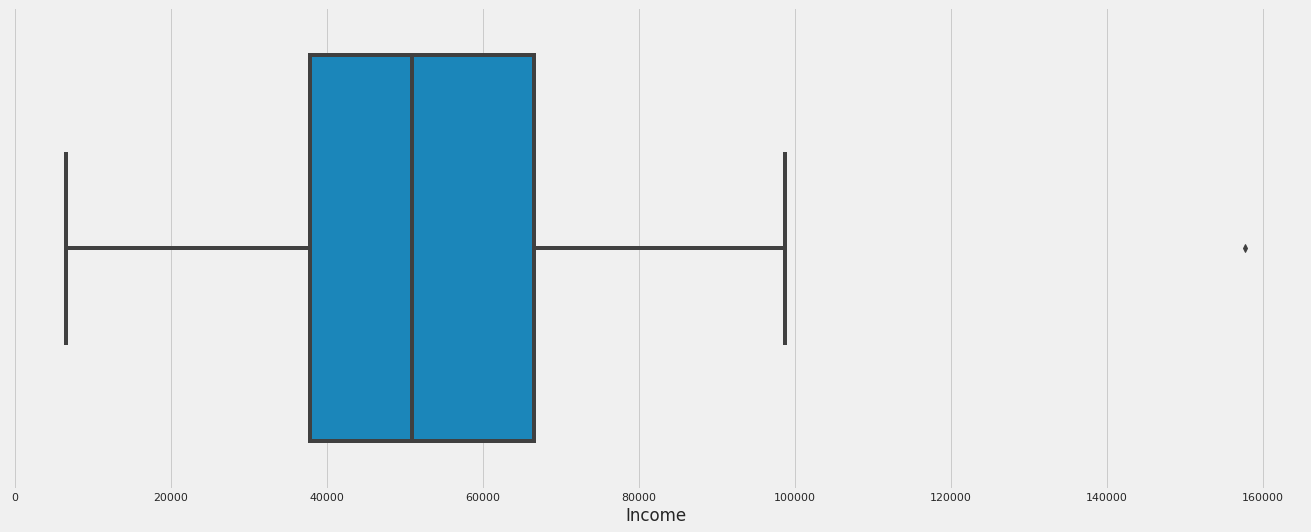

In [47]:
# Check outlier using boxplot
# There is outlier at the right side (> upper whisker)
sns.boxplot(data=df_Master,x=df_Master['Income'])

In [48]:
# Outlier Handling 
Q1  =  df_Master['Income'].quantile(0.25)
Q3  =  df_Master['Income'].quantile(0.75)
IQR =  Q3-Q1
print("Q1 \t\t : ", Q1)
print("Q3 \t\t : ",Q3)
print("IQR \t\t : ",IQR)
Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)
print("Lower Whisker  \t : ", Lower_Whisker)
print("Upper Whisker  \t : ", Upper_Whisker)
filtered_master = (( df_Master['Income'] >= Lower_Whisker) & (df_Master['Income'] <= Upper_Whisker))
df_Master1 = df_Master[filtered_master]
print('Jumlah baris sebelum handling outlier pada kolom Income\t:', len(df_Master))
print(f'Jumlah baris setelah memfilter outlier \t\t\t:', len(df_Master1))
df_Master1.head()

Q1 		 :  37853.75
Q3 		 :  66596.0
IQR 		 :  28742.25
Lower Whisker  	 :  -5259.625
Upper Whisker  	 :  109709.375
Jumlah baris sebelum handling outlier pada kolom Income	: 370
Jumlah baris setelah memfilter outlier 			: 369


,Education,Income
5,Master,62513.0
13,Master,59354.0
18,Master,76995.0
30,Master,10979.0
31,Master,38620.0


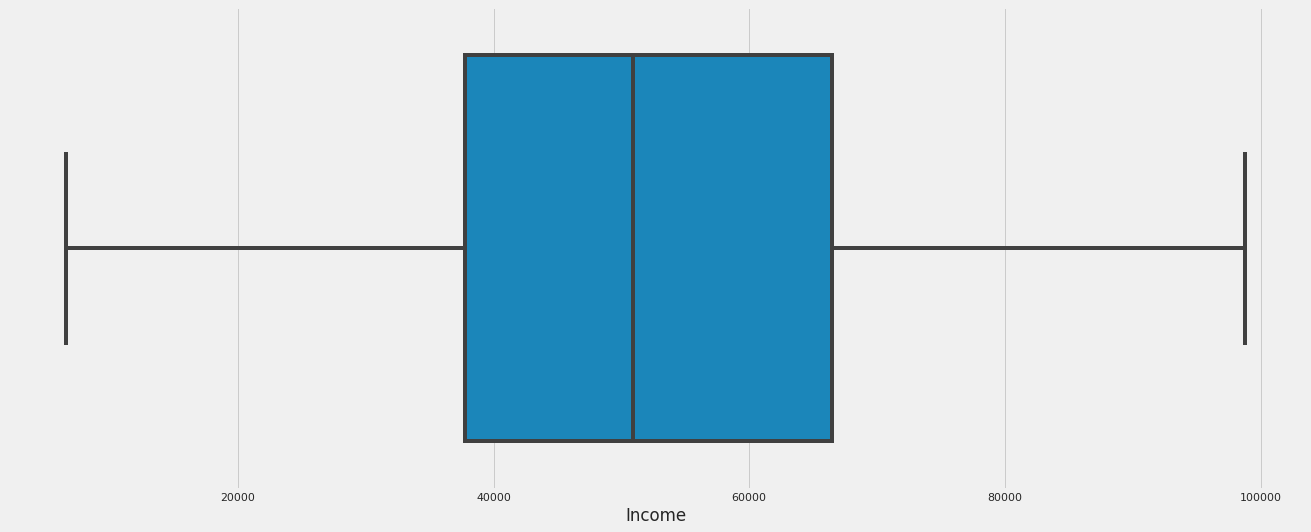

In [49]:
# after clear the outlier data
sns.boxplot(data=df_Master1,x=df_Master1['Income'])

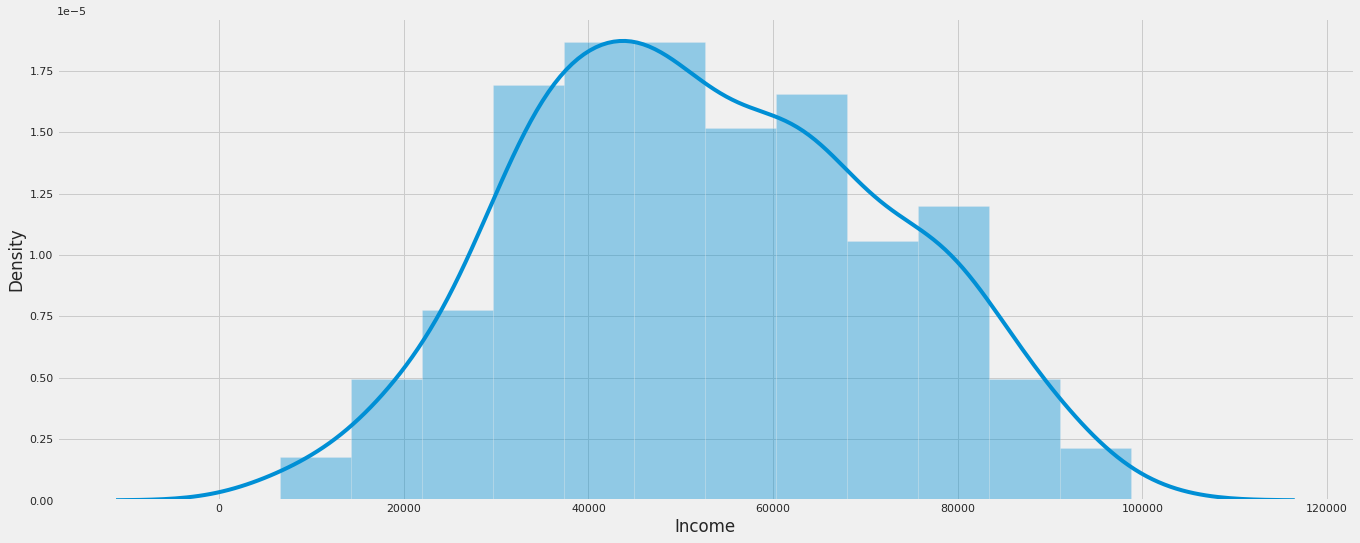

In [50]:
sns.distplot(df_Master1['Income'])

### ***d. Group 4 - 2n Cycle***

In [51]:
# filter data of 2n Cycle group
df_2n_Cycle = observed_df[observed_df['Education'] == '2n Cycle']
df_2n_Cycle

,Education,Income
19,2n Cycle,33812.0
37,2n Cycle,23718.0
46,2n Cycle,7500.0
67,2n Cycle,88194.0
71,2n Cycle,NaN
...,...,...
2193,2n Cycle,82347.0
2210,2n Cycle,41769.0
2213,2n Cycle,80617.0
2222,2n Cycle,7500.0


In [52]:
# Count missing data of 2n Cycle group
nan_2n_Cycle_value1 = df_2n_Cycle.isnull().sum()
nan_2n_Cycle_value1

Education    0
Income       3
dtype: int64

In [53]:
# Show missing data of 2n Cycle group
show_nan_2n_Cycle = df_2n_Cycle[df_2n_Cycle.isna().any(axis=1)]
show_nan_2n_Cycle

,Education,Income
71,2n Cycle,NaN
1383,2n Cycle,NaN
2228,2n Cycle,NaN


In [54]:
# Calculate the percentage of missing data in 2n Cycle group to choose which data cleaning technique is suitable
# Because percentage of missing data in 2n Cycle group is 1,48%, better we use imputation data than remove it
data_missing_value = df_2n_Cycle.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_2n_Cycle))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,Income,3,1.48


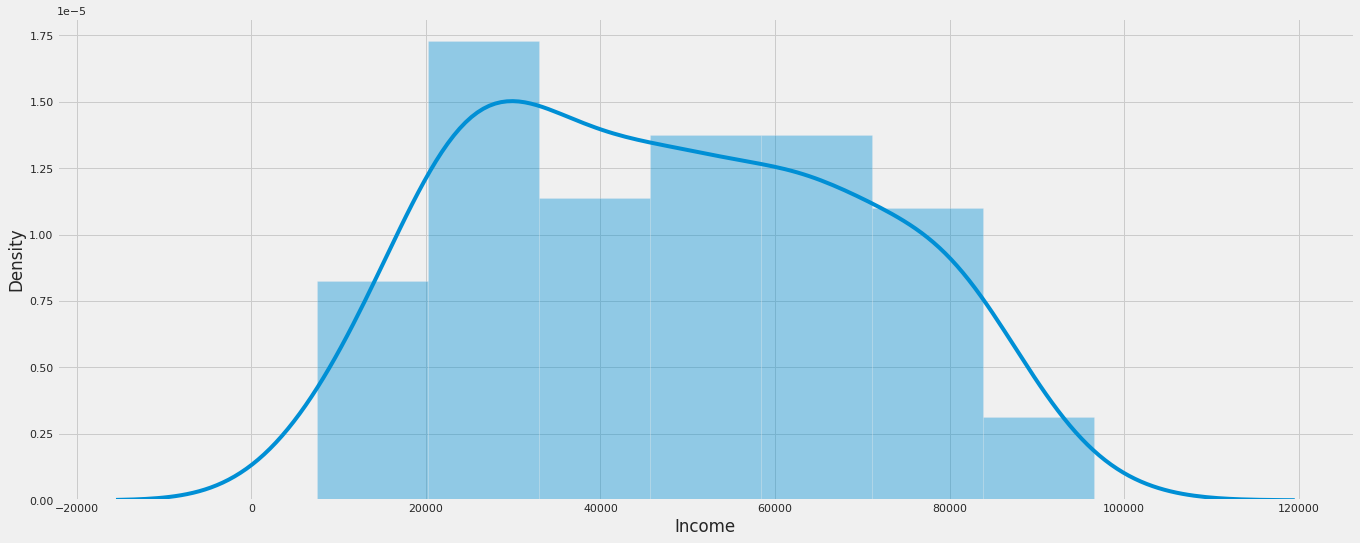

In [55]:
# Draw the distibution of data to make decision whether the imputation better using mean or median
# From graphic below, the variable is normal enough, so the mean is a better representation 
sns.distplot(df_2n_Cycle['Income'])

In [56]:
# Imputation income data of 2n Cycle group using mean
df_2n_Cycle['Income'] = df_2n_Cycle['Income'].fillna(df_2n_Cycle['Income'].mean())
df_2n_Cycle

,Education,Income
19,2n Cycle,33812.00
37,2n Cycle,23718.00
46,2n Cycle,7500.00
67,2n Cycle,88194.00
71,2n Cycle,47633.19
...,...,...
2193,2n Cycle,82347.00
2210,2n Cycle,41769.00
2213,2n Cycle,80617.00
2222,2n Cycle,7500.00


In [57]:
# After imputation there is no missing data
nan_2n_Cycle_value2 = df_2n_Cycle.isnull().sum()
nan_2n_Cycle_value2

Education    0
Income       0
dtype: int64

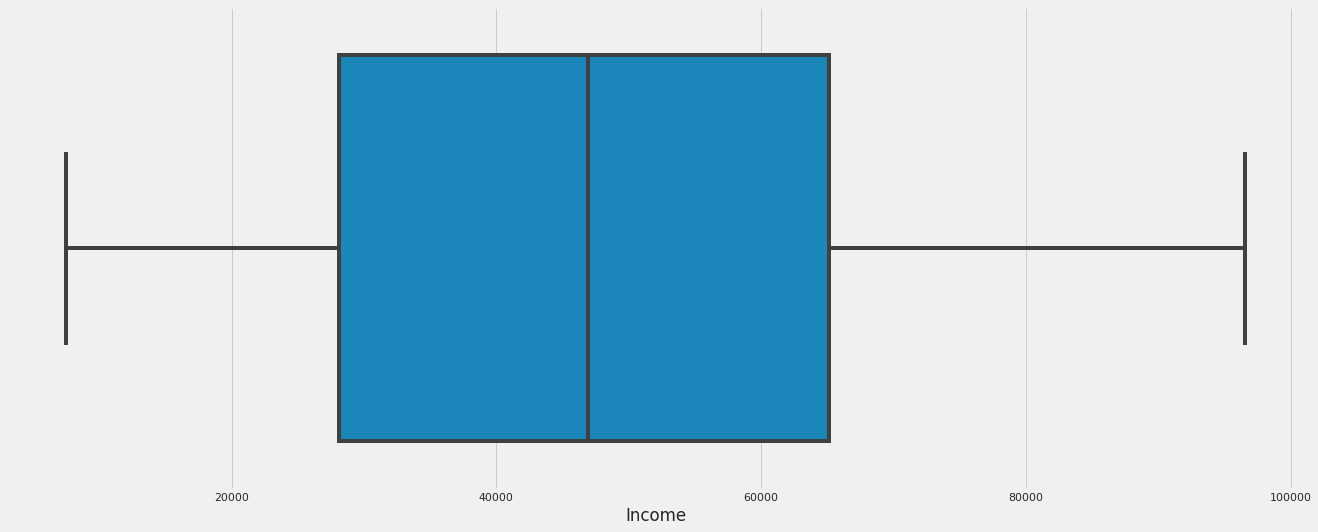

In [58]:
# Check outlier using boxplot
# There is no outlier data
sns.boxplot(data=df_2n_Cycle,x=df_2n_Cycle['Income'])

###***e. Group 5 - Basic***

In [59]:
# filter data of Basic group
df_Basic = observed_df[observed_df['Education'] == 'Basic']
df_Basic

,Education,Income
11,Basic,7500.0
105,Basic,24594.0
136,Basic,9548.0
184,Basic,28249.0
190,Basic,24882.0
280,Basic,24480.0
344,Basic,27190.0
502,Basic,24279.0
608,Basic,30801.0
612,Basic,18978.0


In [60]:
# Count missing data of 2n Cycle group
nan_Basic_value1 = df_Basic.isnull().sum()
nan_Basic_value1

Education    0
Income       0
dtype: int64

In [61]:
df_Basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 11 to 2208
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Education  54 non-null     object 
 1   Income     54 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


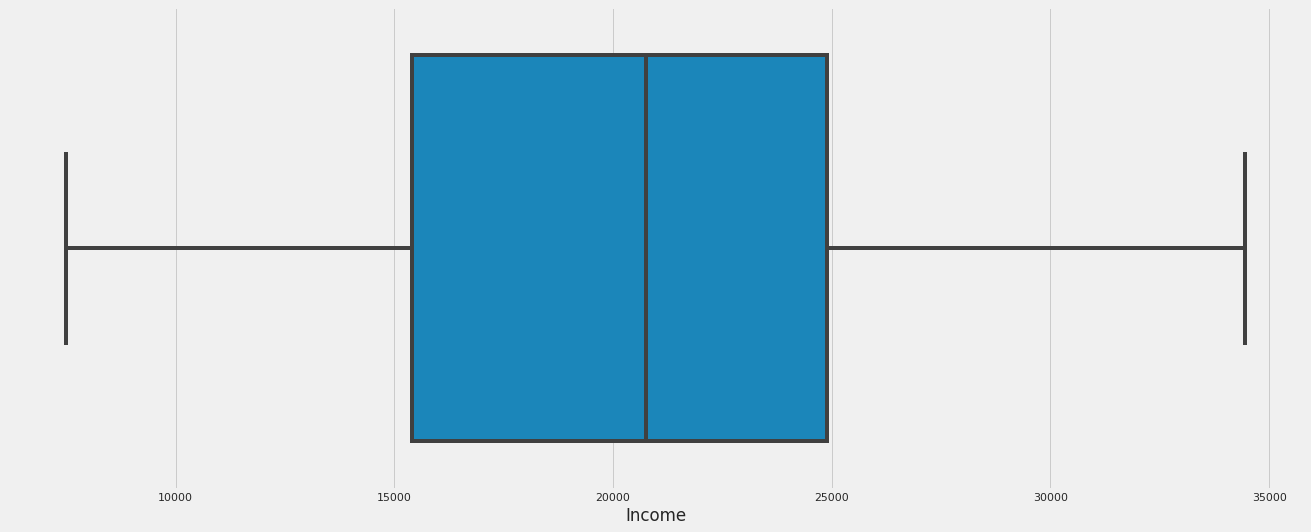

In [62]:
# Check outlier using boxplot
# There is no outlier data
sns.boxplot(data=df_Basic,x=df_Basic['Income'])

### CENTRAL TENDENCY MEASUREMENT & SPREAD MEASUREMENT

### ***a. Group 1 - Graduation***

In [63]:
# calculate mean, median and mode 

print("Central Tendency Measurement of Income of Graduation")

print("average of income  \t\t\t:", round(df_Graduation1['Income'].mean(),2))

print("median of income \t\t\t:", round(df_Graduation1['Income'].median(),2))

print("mode of income \t\t\t\t:", round(stats.mode(df_Graduation1['Income'])[0][0],2))

# calculate variance, standard deviation, range, and quartile (q1, q2, q3)

print("\n" "Spread Measurement of Income of Graduation")

print("variance of income \t\t\t:", round(np.var(df_Graduation1['Income']),2))

print("standard deviation of income \t\t:", round(np.std(df_Graduation1['Income']),2))

print("range of income \t\t\t:", max(df_Graduation1['Income'])-min(df_Graduation1['Income']))

print("q1 \t\t\t\t\t:", np.quantile(df_Graduation1['Income'], 0.25))

print("q2 \t\t\t\t\t:", np.quantile(df_Graduation1['Income'], 0.5))

print("q3 \t\t\t\t\t:", np.quantile(df_Graduation1['Income'], 0.75))

Central Tendency Measurement of Income of Graduation
average of income  			: 51991.21
median of income 			: 52413.0
mode of income 				: 52720.37

Spread Measurement of Income of Graduation
variance of income 			: 432904982.98
standard deviation of income 		: 20806.37
range of income 			: 103741.0
q1 					: 34900.25
q2 					: 52413.0
q3 					: 69546.75


### ***b. Group 2 - PhD***

In [64]:
# calculate mean, median and mode 

print("Central Tendency Measurement of Income of PhD")

print("average of income  \t\t\t:", round(df_PhD1['Income'].mean(),2))

print("median of income \t\t\t:", round(df_PhD1['Income'].median(),2))

print("mode of income \t\t\t\t:", round(stats.mode(df_PhD1['Income'])[0][0],2))

# calculate variance, standard deviation, range, and quartile (q1, q2, q3)

print("\n" "Spread Measurement of Income of PhD")

print("variance of income \t\t\t:", round(np.var(df_PhD1['Income']),2))

print("standard deviation of income \t\t:", round(np.std(df_PhD1['Income']),2))

print("range of income \t\t\t:", max(df_PhD1['Income'])-min(df_PhD1['Income']))

print("q1 \t\t\t\t\t:", np.quantile(df_PhD1['Income'], 0.25))

print("q2 \t\t\t\t\t:", np.quantile(df_PhD1['Income'], 0.5))

print("q3 \t\t\t\t\t:", np.quantile(df_PhD1['Income'], 0.75))

Central Tendency Measurement of Income of PhD
average of income  			: 55157.7
median of income 			: 55212.0
mode of income 				: 55212.0

Spread Measurement of Income of PhD
variance of income 			: 327543821.91
standard deviation of income 		: 18098.17
range of income 			: 98137.0
q1 					: 40451.0
q2 					: 55212.0
q3 					: 68682.0


###***c. Group 3 - Master***

In [65]:
# calculate mean, median and mode 

print("Central Tendency Measurement of Income of Master")

print("average of income  \t\t\t:", round(df_Master1['Income'].mean(),2))

print("median of income \t\t\t:", round(df_Master1['Income'].median(),2))

print("mode of income \t\t\t\t:", round(stats.mode(df_Master1['Income'])[0][0],2))

# calculate variance, standard deviation, range, and quartile (q1, q2, q3)

print("\n" "Spread Measurement of Income of Master")

print("variance of income \t\t\t:", round(np.var(df_Master1['Income']),2))

print("standard deviation of income \t\t:", round(np.std(df_Master1['Income']),2))

print("range of income \t\t\t:", max(df_Master1['Income'])-min(df_Master1['Income']))

print("q1 \t\t\t\t\t:", np.quantile(df_Master1['Income'], 0.25))

print("q2 \t\t\t\t\t:", np.quantile(df_Master1['Income'], 0.5))

print("q3 \t\t\t\t\t:", np.quantile(df_Master1['Income'], 0.75))

Central Tendency Measurement of Income of Master
average of income  			: 52606.73
median of income 			: 50943.0
mode of income 				: 50943.0

Spread Measurement of Income of Master
variance of income 			: 371013610.61
standard deviation of income 		: 19261.71
range of income 			: 92217.0
q1 					: 37787.0
q2 					: 50943.0
q3 					: 66476.0


### ***d. Group 4 - 2n Cycle***

In [66]:
# calculate mean, median and mode 

print("Central Tendency Measurement of Income of 2n Cycle")

print("average of income  \t\t\t:", round(df_2n_Cycle['Income'].mean(),2))

print("median of income \t\t\t:", round(df_2n_Cycle['Income'].median(),2))

print("mode of income \t\t\t\t:", round(stats.mode(df_2n_Cycle['Income'])[0][0],2))

# calculate variance, standard deviation, range, and quartile (q1, q2, q3)

print("\n" "Spread Measurement of Income of 2n Cycle")

print("variance of income \t\t\t:", round(np.var(df_2n_Cycle['Income']),2))

print("standard deviation of income \t\t:", round(np.std(df_2n_Cycle['Income']),2))

print("range of income \t\t\t:", max(df_2n_Cycle['Income'])-min(df_2n_Cycle['Income']))

print("q1 \t\t\t\t\t:", np.quantile(df_2n_Cycle['Income'], 0.25))

print("q2 \t\t\t\t\t:", np.quantile(df_2n_Cycle['Income'], 0.5))

print("q3 \t\t\t\t\t:", np.quantile(df_2n_Cycle['Income'], 0.75))

Central Tendency Measurement of Income of 2n Cycle
average of income  			: 47633.19
median of income 			: 46891.0
mode of income 				: 7500.0

Spread Measurement of Income of 2n Cycle
variance of income 			: 479613312.75
standard deviation of income 		: 21900.08
range of income 			: 89047.0
q1 					: 28095.0
q2 					: 46891.0
q3 					: 65100.5


###***e. Group 5 - Basic***

In [67]:
# calculate mean, median and mode 

print("Central Tendency Measurement of Income of Basic")

print("average of income  \t\t\t:", round(df_Basic['Income'].mean(),2))

print("median of income \t\t\t:", round(df_Basic['Income'].median(),2))

print("mode of income \t\t\t\t:", round(stats.mode(df_Basic['Income'])[0][0],2))

# calculate variance, standard deviation, range, and quartile (q1, q2, q3)

print("\n" "Spread Measurement of Income of Basic")

print("variance of income \t\t\t:", round(np.var(df_Basic['Income']),2))

print("standard deviation of income \t\t:", round(np.std(df_Basic['Income']),2))

print("range of income \t\t\t:", max(df_Basic['Income'])-min(df_Basic['Income']))

print("q1 \t\t\t\t\t:", np.quantile(df_Basic['Income'], 0.25))

print("q2 \t\t\t\t\t:", np.quantile(df_Basic['Income'], 0.5))

print("q3 \t\t\t\t\t:", np.quantile(df_Basic['Income'], 0.75))

Central Tendency Measurement of Income of Basic
average of income  			: 20306.26
median of income 			: 20744.0
mode of income 				: 7500.0

Spread Measurement of Income of Basic
variance of income 			: 38156130.67
standard deviation of income 		: 6177.06
range of income 			: 26945.0
q1 					: 15405.25
q2 					: 20744.0
q3 					: 24882.0


### HYPOTHESIS TESTING

In [68]:
# Hypothesis testing using anova one way
anova_test = stats.f_oneway(df_Graduation1['Income'], df_PhD1['Income'], df_Master1['Income'], df_2n_Cycle['Income'], df_Basic['Income'] )

In [69]:
# calculate the p value
anova_test.pvalue

4.150642409319721e-32

In [70]:
# Conclusion
print("So the conclusion is : \n")
if anova_test.pvalue>0.05:
    print('All education level have same income average and there is no significant effect between education and income')
else:
    print('At least one of education level income mean is different from the rest and there is significant effect between education and income')

So the conclusion is : 

At least one of education level income mean is different from the rest and there is significant effect between education and income


In [71]:
#summary of income mean of education level
print("Income Mean of Education Level : \n")
print("Graduation  \t\t:", round(df_Graduation1['Income'].mean(),2))
print("PhD  \t\t\t:", round(df_PhD1['Income'].mean(),2))
print("Master  \t\t:", round(df_Master1['Income'].mean(),2))
print("2n Cycle  \t\t:", round(df_2n_Cycle['Income'].mean(),2))
print("Basic  \t\t\t:", round(df_Basic['Income'].mean(),2))

Income Mean of Education Level : 

Graduation  		: 51991.21
PhD  			: 55157.7
Master  		: 52606.73
2n Cycle  		: 47633.19
Basic  			: 20306.26
